In [1]:
%pip install -U matplotlib numpy pandas scipy scikit-learn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
m = 100

In [3]:
def load_data(missao_polinomial_path):
    return pd.read_csv(missao_polinomial_path)

In [4]:
df = load_data("world_population.csv")
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [19]:
x = df['Rank'].values.reshape(-1, 1)
y = df['2020 Population'].values

In [20]:
grau_do_polinomio = 2  # Definindo o grau do polinômio desejado (por exemplo, 2 para polinômio quadrático)
polynomial_features = PolynomialFeatures(degree=grau_do_polinomio)
x_poly = polynomial_features.fit_transform(x)

In [21]:
poly_features = PolynomialFeatures(degree=2)  # Grau do polinômio desejado
x_poly = poly_features.fit_transform(x)

In [22]:
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)

LinearRegression()

In [24]:
y_pred = poly_reg.predict(x_poly)

In [25]:
print("Coeficientes:", poly_reg.coef_)
print("Intercepto:", poly_reg.intercept_)

Coeficientes: [       0.         -3423550.25285724    11535.2476334 ]
Intercepto: 223875339.3444983


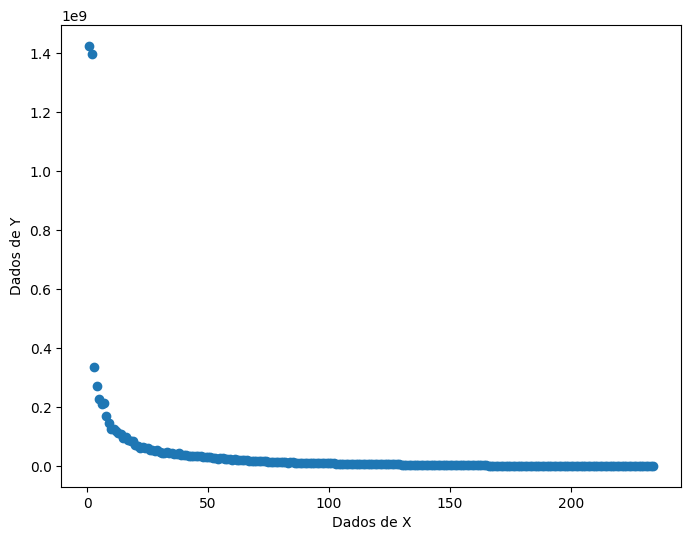

In [26]:
plt.figure(figsize=(8, 6))  
plt.scatter(x, y)
plt.xlabel("Dados de X")
plt.ylabel("Dados de Y")
plt.show()

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x.reshape(-1, 1))
x[0]

array([36], dtype=int64)

In [29]:
x_poly[0]

array([  36., 1296.])

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

# Gerar a predição com base no modelo de regressão linear
x_pred = np.linspace(min(x), max(x), m).reshape(-1, 1)
x_pred_poly = poly_features.transform(x_pred)
y_pred = lin_reg.predict(x_pred_poly)

NameError: name 'm' is not defined